In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

print("pandas version: {}".format(pd.__version__))
print("seaborn version: {}".format(sns.__version__))
print("numpy version: {}".format(np.__version__))

pandas version: 1.0.3
seaborn version: 0.10.0
numpy version: 1.18.1


In [2]:
data = pd.read_csv("./Tut51Q3.csv")
data.head()

,Company,X1,X2
0,Citgroup,108.28,17.05
1,General Electric,152.36,16.59
2,AIG,95.04,10.91
3,Bank of America,65.45,14.14
4,HSBC Group,62.97,9.52


Data on $X_1$ = sales and $X_2$ = profits for 10 large companies in the world are obtained as follow:

In [3]:
data

,Company,X1,X2
0,Citgroup,108.28,17.05
1,General Electric,152.36,16.59
2,AIG,95.04,10.91
3,Bank of America,65.45,14.14
4,HSBC Group,62.97,9.52
5,ExxonMobil,263.99,25.33
6,Royal Dutch/Shell,265.19,18.54
7,BP,285.06,15.73
8,ING Group,92.01,8.10
9,Toyota Motor,165.68,11.13


In [4]:
data_reduced = data.drop(['Company'], axis = 1)
data_reduced

,X1,X2
0,108.28,17.05
1,152.36,16.59
2,95.04,10.91
3,65.45,14.14
4,62.97,9.52
5,263.99,25.33
6,265.19,18.54
7,285.06,15.73
8,92.01,8.10
9,165.68,11.13


They have the following sample mean and sample covariance matrix:<br>

$\bar{x}= \begin{bmatrix}155.60  \\14.70  \end{bmatrix}  
\mathbf{C} = 
\begin{bmatrix}{}
7476.45 & 303.62 \\
303.62 & 26.19\\
\end{bmatrix}$

**(a) Using the sample covariance matrix C,**

**(i) determine the two principal components and their eigenvalues.**

In [5]:
cov = np.array([[7476.45, 303.62], [303.62, 26.19]])
cov

array([[7476.45,  303.62],
       [ 303.62,   26.19]])

In [9]:
evalue, evector = np.linalg.eig(cov)

In [10]:
evalue

array([7488.80292589,   13.83707411])

In [11]:
# evector is the pc!
evector

array([[ 0.99917337, -0.04065185],
       [ 0.04065185,  0.99917337]])

The principal components of $C$ are<br>
$\hat{y_1}  = 0.999x_1 + 0.041x_2$<br>
$\hat{y_2}  = -0.041x_1 + 0.999x_2$<br>
and their eigenvalues are $\lambda_1 = 7488.8$ and $\lambda_2 = 13.8$

**(ii) find the percentage of total variance explained by each principal component.**

The percentage of total variance explained by $PC_1$ is $99.82\%$ and the percentage total variance explained by $PC_2$ is $0.18\%$

**(iii) Create a scatterplot of the data. Indicate the directions of the principal components obtained on your scatterplot.**

In [15]:
# mean is the center of the graph
xmean, ymean = np.mean(data_reduced)

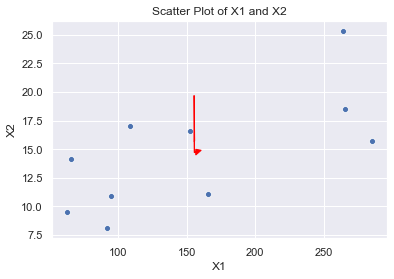

In [52]:
ax = sns.scatterplot(x="X1", y="X2", data=data_reduced)
# param: x, y = arrow base (mean)
# dx, dy = length of arrow (eigenvector)
ax.arrow(xmean, ymean, 0.99917337, 0.04065185, head_width=0.5, head_length=4, color="red")
ax.arrow(xmean, ymean, -0.04065185, 0.99917337, head_width=0.5, head_length=4, color="red")

plt.title("Scatter Plot of X1 and X2")

plt.show()

**(b) Compute the sample correlation matrix R of the data. Then,**

In [25]:
mean = np.array([155.6, 14.7])
cov = np.array([[7476.45, 303.62], [303.62, 26.19]])
# sample correlation matrix
R = np.corrcoef(data_reduced, rowvar=0)
R

array([[1.        , 0.68613603],
       [0.68613603, 1.        ]])

In [29]:
# there are 2 ways to normalize data
# 1. use sklearn preprocessing.scale
data_scaled = pd.DataFrame(preprocessing.scale(data_reduced), columns=['Z1', 'Z2'])
data_scaled

,Z1,Z2
0,-0.576904,0.483211
1,-0.039535,0.388463
2,-0.738309,-0.781458
3,-1.099034,-0.116168
4,-1.129267,-1.067759
5,1.321320,2.188659
6,1.335949,0.790109
7,1.578180,0.211327
8,-0.775247,-1.360240
9,0.122846,-0.736144


In [30]:
# 2. use z = (x-μ)/σ
z = (data_reduced - mean)/data_reduced.std()
z.columns = ['Z1', 'Z2']
z

,Z1,Z2
0,-0.547264,0.459195
1,-0.037471,0.369310
2,-0.700387,-0.740575
3,-1.042600,-0.109425
4,-1.071282,-1.012184
5,1.253549,2.077126
6,1.267427,0.750345
7,1.497227,0.201264
8,-0.735429,-1.289655
9,0.116577,-0.697586


**(i) determine the two principal components and their eigenvalues.**

In [32]:
evalueR, evectorR = np.linalg.eig(R)

In [33]:
evalueR

array([0.31386397, 1.68613603])

In [34]:
evectorR

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

The principal components of $C$ are<br>
$\hat{y_1}  = 0.707x_1 + 0.707x_2$<br>
$\hat{y_2}  = -0.707x_1 + 0.707x_2$<br>
and their eigenvalues are $\lambda_1 = 1.686$ and $\lambda_2 = 0.314$

**(ii) find the percentage of total variance explained by each principal component.**

In [40]:
total_evalueR = evalueR[0] + evalueR[1]
percentage_R = np.round((evalueR/total_evalueR)*100, 2)
percentage_R

array([15.69, 84.31])

The percentage of total variance explained by $PC_1$ is $84.31\%$ and the percentage total variance explained by $PC_2$ is $15.69\%$

**(iii) Create a scatterplot of the data. Indicate the directions of the principal components obtained on your scatterplot.**

In [51]:
xmeanR, ymeanR = np.mean(data_scaled)

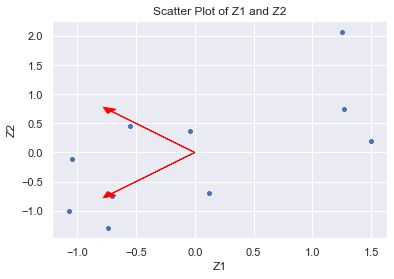

In [50]:
ax2 = sns.scatterplot(x="Z1", y="Z2", data=z)
ax2.arrow(xmeanR, ymeanR, -0.70710678, -0.70710678, head_width=0.1, head_length=0.1, color="red")
ax2.arrow(xmeanR, ymeanR, -0.70710678, 0.70710678, head_width=0.1, head_length=0.1, color="red")
plt.title("Scatter Plot of Z1 and Z2")
plt.show()

**(c) Compare your results obtained in parts (a) and (b).**

Using covariance matrix, the percentage of total variance explained by $PC_1$ is $99.82\%$ and the percentage total variance explained by $PC_2$ is $0.18\%$. Meanwhile, when we use correlation matrix, the percentage of total variance explained by $PC_1$ is $84.31\%$ and the percentage total variance explained by $PC_2$ is $15.69\%$